# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

zipfile module info https://docs.python.org/3/library/zipfile.html
PILLOW here: https://pillow.readthedocs.io/en/latest/
pytesseract docs: https://pypi.org/project/pytesseract
opencv-python docs here: https://pypi.org/project/opencv-python
    opencv main doc page https://docs.opencv.org/master/index.html
    

Found search word, "Mark" in file a-0.png
6 faces found


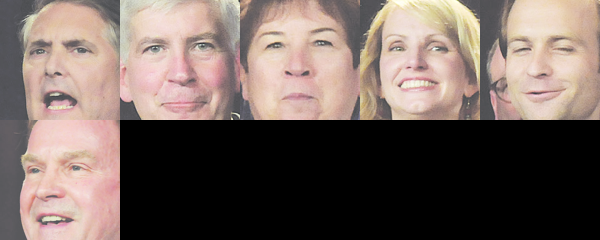

Found search word, "Mark" in file a-1.png
5 faces found


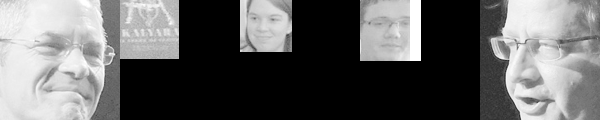

Found search word, "Mark" in file a-2.png
3 faces found


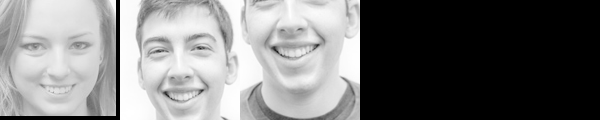

Found search word, "Mark" in file a-3.png
2 faces found


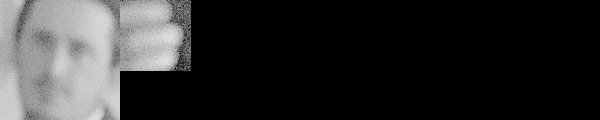

Search word, "Mark", not found in file a-4.png
Search word, "Mark", not found in file a-5.png
Search word, "Mark", not found in file a-6.png
Search word, "Mark", not found in file a-7.png
Found search word, "Mark" in file a-8.png
1 faces found


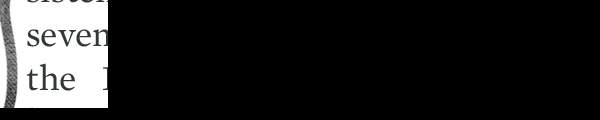

Search word, "Mark", not found in file a-9.png
Found search word, "Mark" in file a-10.png
0 faces found
Search word, "Mark", not found in file a-11.png
Search word, "Mark", not found in file a-12.png
Found search word, "Mark" in file a-13.png
2 faces found


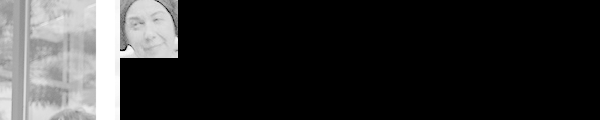

Done processing images from Zip File!


In [1]:
import zipfile as zf

from PIL import Image
#from PIL import ImageEnhance
from PIL import ImageDraw
#from PIL import ImageFont
import pytesseract as pt
import cv2 as cv
import numpy as np

# loading the face detection classifier
faceCascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!
# well good tluck to me, then!
'''TODO
    : Get the image files out of the zip file DONE!
    : Do the OCR on each image file, to get a list of words found in each image DONE!
    : if the search word is in the images found words, 
        : Do a opencv to find all the faces in that image DONE!
        : build a contact sheet with all the faces in that image'''

#path to zip file to use, and search word
zipPath = 'readonly/images.zip'
searchWord = 'Mark'
#smaller file and different word, for dev and testing
#zipPath = 'readonly/small_img.zip'
#searchWord = 'Christopher'

tmpImgFile = "readonly/tmp.png"


def getImageText(imIn):
    '''use OCR to return a string of text (words) found in the image
        param: imIn, PIL image
        return: one long string of characters'''
    wi = imIn.convert("L") #make a copy and convert to black and white image
    #display(wi) #debug
    it = pt.image_to_string(wi) #run the pytesseract function to get text from image    
    return it

def findFaces(imFileName):
    '''use opencv to find faces in image file passed in
        param: imIn, PIL image file
        return: new image, that is contact sheet of faces
        1.35 gives the same results as the instructor, but could get better later
        will need to tune this for better results'''
    
    wi = cv.imread(imFileName) #load the temp image file into opencv    
    gray = cv.cvtColor(wi, cv.COLOR_BGR2GRAY) #convert to grayscale
    faces = faceCascade.detectMultiScale(gray, 1.35) #find face, returns a list of where faces are found
    #print(len(faces)) #debug
    
    if len(faces) == 0: #to handle case of no faces found
        faceList = []
    else:
        faceList = faces.tolist() #convert to a list of rectangles
                
    #print(faceList) #debug
    #should probably delete temp image file after processing!!
    return faceList


def show_rects(faces,imIn): 
    '''FOR DEV Purposes, display rectangles on faces found, just to check
        param: faces, list of boxes of face location in image
        param: imIn, PIL image containing faces'''
    
    # Set our drawing context
    drawing=ImageDraw.Draw(imIn)
    # And plot all of the rectangles in faces
    for x,y,w,h in faces:
        drawing.rectangle((x,y,x+w,y+h), outline="red", width=4)
    #Finally lets display this
    display(imIn)
    """will replace this with copy out pixels and paste into base image"""
    
def buildBase(liLen):
    '''returns black base image to build contact sheet of faces found
         param: liLen, list length of faces'''
    
    if liLen % 5 == 0:
        rows = liLen / 5
    else:
        rows = (liLen // 5) + 1  
    #print("rows = {}".format(rows))  #debug  
    bi = Image.new('RGBA',(600,120 * int(rows)),(0,0,0,255))
    #display(bi) #debug
    #instantiate draw object
    #do = ImageDraw.Draw(bi) #don't req image text for this!!
    #draw text in and return image
    #do.text((1,1),st, fill = (255,255,255,255)) #might need to change/add font
    return bi
    
def buildSheet(im, imList):
    '''Build and return the contact sheet image
        param: im, PIL image containing faces
        param: imList, list of faces in the image'''
    
    bs = buildBase(len(imList)) #get the black base image
    #display(bs) #debug

    row =0
    col=0
    for x,y,w,h in imList:
        wi = im.copy() #make a working copy
        ci = wi.crop((x, y, x+w, y+h)) #crop to face
        ci.thumbnail((120,120))
        #display(wi) #debug
        bs.paste(ci, (col * 120, row * 120 ))
        
        if col < 4: #move pasting location
            col += 1
        else:
            col = 0
            row += 1
            
    return bs
    
    
with zf.ZipFile(zipPath, 'r') as zFile: #this opens the zip to expose files in it
    fileList = zFile.namelist() #returns a list of file names in zip
    #print(fileList) #debug
    
    for imgName in fileList: #iterate thru image files in zip, should use error checking incase of non image, but?
        img = Image.open(zFile.open(imgName)) #this is a PIL Image object
        #print(imgName) #debug
        #display(img) #debug
        imageTxt = getImageText(img) #get text as a string, from image
        #print(imageTxt) #debug
        if searchWord in imageTxt:
            print('Found search word, "{}" in file {}'.format(searchWord, imgName))
            img.save(tmpImgFile) #save the file for opencv to pickup
            fl = findFaces(tmpImgFile) #TODO: will need to check for an empty list
            print("{} faces found".format(len(fl)))
            #show_rects(fl,img) #Debug,should show image with boxes around faces
            if len(fl) > 0: #no need to build and show contact sheet if no faces are found
                cs = buildSheet(img, fl) #build contact sheet
                display(cs) #display contact sheet
        else:
            print('Search word, "{}", not found in file {}'.format(searchWord, imgName))
            
    print('Done processing images from Zip File!')

        